<a href="https://colab.research.google.com/github/FarahYusri12/Warfarin/blob/main/Warfarin_Dose_by_Genetic_risk_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('df_gen.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5700 non-null   object 
 1   Dose (mg)                5528 non-null   float64
 2   CYP2C9                   5567 non-null   object 
 3   VKORC1 (rs9923231; C/T)  4046 non-null   object 
dtypes: float64(1), object(3)
memory usage: 178.3+ KB


In [2]:
print(df['CYP2C9'].unique())
print("\n" + "="*50 + "\n")
print(df['VKORC1 (rs9923231; C/T)'].unique())

['*1/*1' '*1/*3' '*1/*2' '*2/*2' '*2/*3' '*3/*3' nan '*1/*5' '*1/*13'
 '*1/*14' '*1/*11' '*1/*6']


['A/G' 'A/A' 'G/G' nan]


In [3]:
# Cleaning by remove missing value and any duplication

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()
print("\n" + "="*50 + "\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3859 entries, 0 to 5410
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3859 non-null   object 
 1   Dose (mg)                3859 non-null   float64
 2   CYP2C9                   3859 non-null   object 
 3   VKORC1 (rs9923231; C/T)  3859 non-null   object 
dtypes: float64(1), object(3)
memory usage: 150.7+ KB




,ID,Dose (mg),CYP2C9,VKORC1 (rs9923231; C/T)
0,PA135312261,49.0,*1/*1,A/G
1,PA135312262,42.0,*1/*1,A/A
2,PA135312263,53.0,*1/*1,G/G
3,PA135312264,28.0,*1/*1,A/G
4,PA135312265,42.0,*1/*3,A/G


In [5]:
# calculate the risk score
def Warfarin_risk_score(CYP2C9, VKORC1):
  score= 0

# scoring for CYP2C9
  if CYP2C9.strip() == "*1/*1":
    score += 0
  elif CYP2C9.strip() in ["*1/*2", "*1/*3"]:
    score += 1
  else:
    score += 2
# 'in' operator was included to verify if the string is one of the values in a list.

# scoring for VKORC1
  if VKORC1.strip() == "G/G":
    score += 0
  elif VKORC1.strip() == "A/G":
    score += 1
  elif VKORC1.strip() == "A/A":
    score += 2


  return score

# Add risk score to dataframe
df['Risk_score'] = df.apply(lambda x: Warfarin_risk_score(x['CYP2C9'], x['VKORC1 (rs9923231; C/T)']), axis=1)
df.head()

,ID,Dose (mg),CYP2C9,VKORC1 (rs9923231; C/T),Risk_score
0,PA135312261,49.0,*1/*1,A/G,1
1,PA135312262,42.0,*1/*1,A/A,2
2,PA135312263,53.0,*1/*1,G/G,0
3,PA135312264,28.0,*1/*1,A/G,1
4,PA135312265,42.0,*1/*3,A/G,2


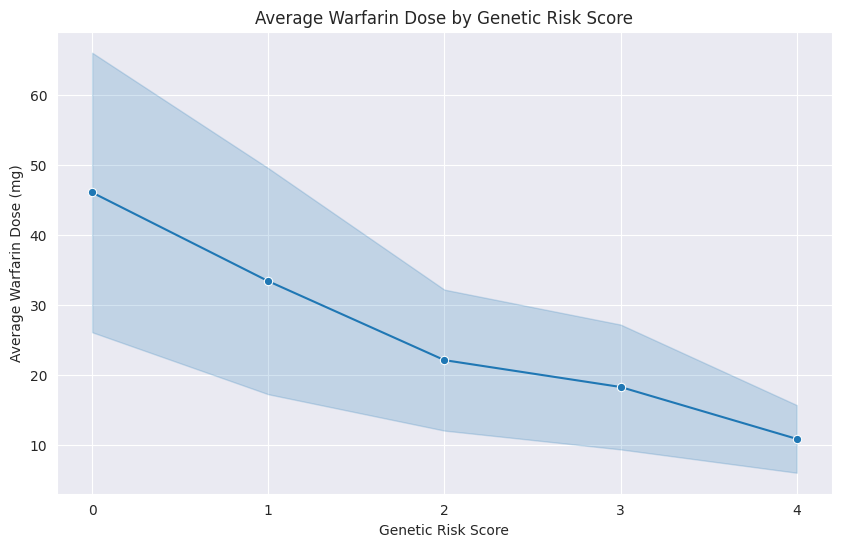

In [16]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Risk_score', y='Dose (mg)', data=df,
             marker='o', errorbar='sd') # marker untuk titik, errorbar='sd' untuk standard deviation
plt.title('Average Warfarin Dose by Genetic Risk Score')
plt.xlabel('Genetic Risk Score')
plt.ylabel('Average Warfarin Dose (mg)')
plt.grid(True)
plt.xticks(df['Risk_score'].unique()) # Pastikan semua skor risiko diskret ditunjukkan
plt.show()